In [87]:
import pandas as pd
import numpy as np

In [88]:
import os

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
df = pd.DataFrame(columns = ['time'])


In [ ]:
df['time'] = pd.to_datetime(df['time'])

In [177]:
dataframes = []

In [178]:
directory = '/Users/barry/CodeAcademy/Ideal_dataset/updated_hourly_csv'
for file in os.listdir(directory):
    if file.endswith('.csv'):
        temp = file[:-4]
        filepath = os.path.join(directory, file)
        temp = pd.read_csv(filepath)
        dataframes.append(temp)

        
        

In [179]:
# Concatenate all dataframes
df2 = pd.concat(dataframes)

# Convert 'time' column to datetime if it's not already
df2['time'] = pd.to_datetime(df2['time'])

# Group by 'time' and sum 'electric-combined', get first non-null value for other columns
grouped = df2.groupby('time')
result2 = grouped.agg({col: 'mean' for col in df2.columns if col != 'electric-combined'})
result2['weather_code (wmo code)'] = grouped['weather_code (wmo code)'].apply(lambda x: x.mode()[0]).values
result2['electric-combined'] = grouped['electric-combined'].sum().values
# Reset index
result2 = result2.reset_index(drop=True)

In [140]:
display(result2.head())

,time,hot-water-hot-pipe,central-heating-flow,central-heating-return,gas,hot-water-cold-pipe,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),...,freezer,utility-room-sockets,dehumidifier,electricoven,sockets2,sockets1,oven,water-heater,induction-hob,electric-combined
0,2018-01-30 00:00:00,24567.989189,29524.132275,27138.540541,202.842105,21375.797872,3.836126,81.445026,1,19.168063,...,0.0,NaN,0.0,0.0,827.0,5536.0,488.0,0.0,NaN,6849.43
1,2018-01-30 01:00:00,23381.518919,28159.687831,26140.394595,261.400000,20963.856383,4.215183,80.434555,1,19.943979,...,0.0,NaN,0.0,0.0,686.0,6042.0,536.0,0.0,NaN,6741.00
2,2018-01-30 02:00:00,22145.810811,26080.111111,24301.416216,198.057895,20181.372340,4.811518,79.424084,3,20.600524,...,0.0,NaN,0.0,0.0,836.0,6278.0,500.0,0.0,NaN,6423.83
3,2018-01-30 03:00:00,21360.059459,26360.100529,23845.870270,210.789474,19633.622340,4.853927,80.350785,3,22.435079,...,0.0,NaN,0.0,0.0,684.0,8468.0,453.0,0.0,NaN,7477.02
4,2018-01-30 04:00:00,20977.935135,27667.777778,24869.783784,309.589474,19574.952128,5.151309,79.424084,3,21.845026,...,0.0,NaN,0.0,0.0,725.0,10424.0,459.0,0.0,NaN,7414.48


In [180]:
result2 = result2[['time','temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined']]

In [152]:
result2.sample(20)

,time,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric-combined
7584,2017-06-22 14:00:00.000000000,17.216949,69.949153,3,15.494915,256.983051,3.0,14.0,1798.48
10166,2017-10-08 04:00:00.000000000,9.830328,91.606557,2,13.326230,255.409836,6.0,4.0,3680.15
10538,2017-10-23 16:00:00.000000000,14.115038,76.473684,3,18.157143,218.578947,0.0,16.0,10137.10
5170,2017-03-14 00:00:00.000000000,10.009756,82.000000,2,27.800000,221.000000,1.0,0.0,1337.24
14934,2018-04-24 20:00:00.000000256,8.546606,77.212670,3,11.890045,251.067873,1.0,20.0,17723.06
11655,2017-12-09 05:00:00.000000000,-0.328655,75.812865,0,21.686550,259.678363,5.0,5.0,6362.82
14300,2018-03-29 10:00:00.000000000,4.745249,78.321267,3,9.767873,61.262443,3.0,10.0,10928.56
14225,2018-03-26 07:00:00.000000000,1.871560,87.458716,0,12.866055,237.816514,0.0,7.0,18922.83
8212,2017-07-18 18:00:00.000000000,20.298611,70.847222,0,19.933333,129.013889,1.0,18.0,3138.24
6660,2017-05-15 02:00:00.000000000,10.200000,78.000000,3,18.500000,188.000000,0.0,2.0,0.00


In [ ]:
# Assuming 'result2' is your DataFrame and 'electric-combined' is the electric-combined you want to plot
autocorrelation = result2['electric-combined'].autocorr()

print('Autocorrelation: ', autocorrelation)
plt.subplots(1,1,figsize= (25,6))
plt.acorr(result2['electric-combined'], maxlags=48)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
#plt.xticks(range(-40, 41))
plt.ylabel('Autocorrelation')
plt.show()

there is a real high correlation at -1 and -25 and + 24

In [181]:
df = result2.copy()

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_40580/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


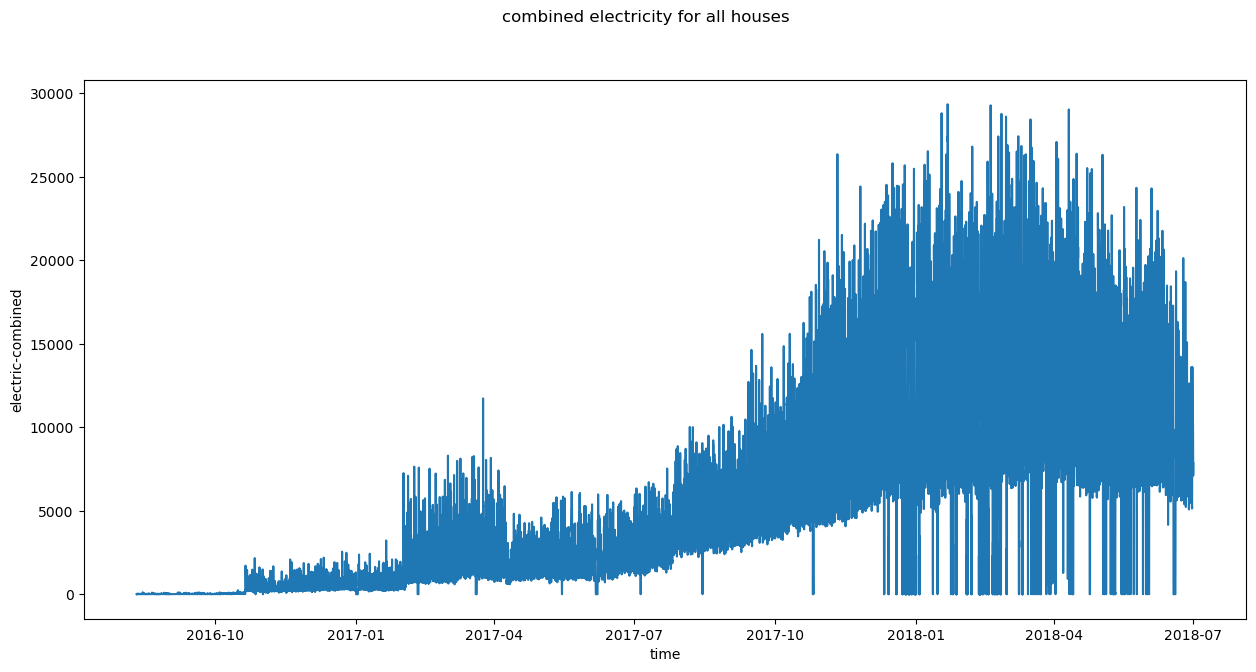

In [182]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [183]:
start_date = pd.to_datetime('2017-09-01')
end_date = pd.to_datetime('2018-03-01')
df = df[(df.time >= start_date) & (df.time < end_date)]

In [184]:
df.index= df.time

TypeError: incompatible index of inserted column with frame index

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_40580/2312037785.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


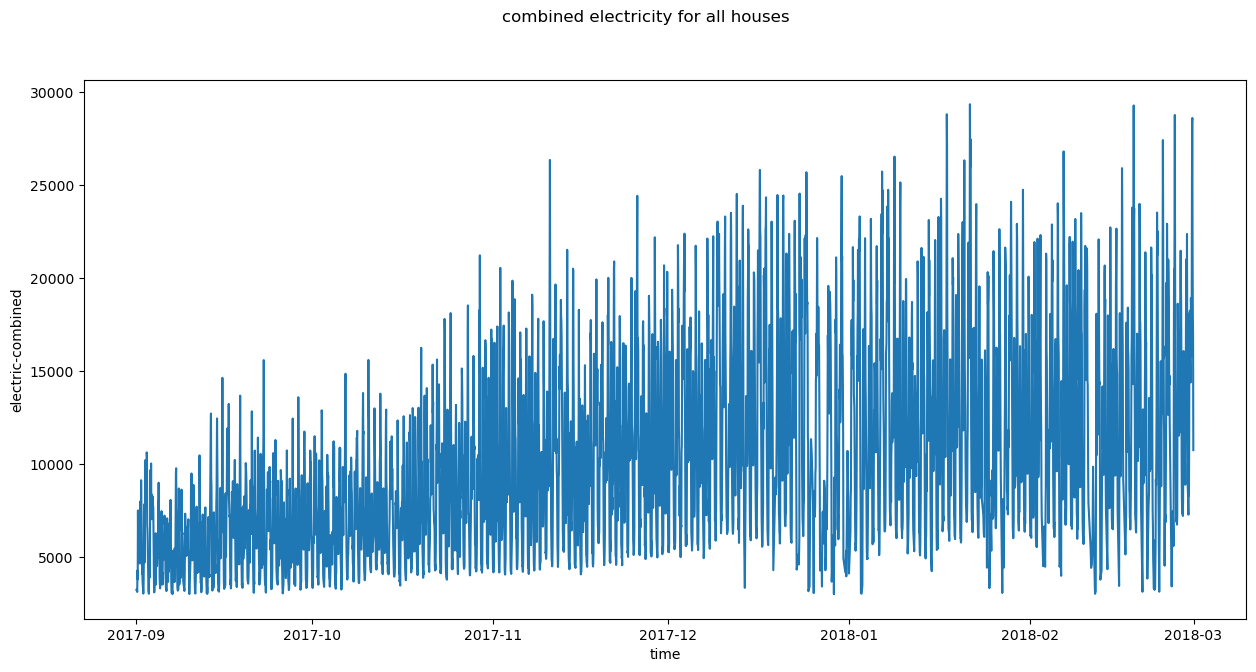

In [193]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [ ]:
#df.to_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

In [192]:
mask = df['electric-combined'] < 3000
df.loc[mask, 'electric-combined'] = (df.loc[~mask, 'electric-combined'].shift() + df.loc[~mask, 'electric-combined'].shift(-1)) / 2

In [ ]:
df['electric-combined'][df['electric-combined'] < 2500] = df['electric-combined'].shift(24)

In [ ]:
#df['electric-combined-next-hour'] = df['electric-combined'].shift(-1)

In [111]:
df['electric-combined_3H-forecast'] = df['electric-combined'].shift(-1)

In [112]:
df['electric-combined-yesterday'] = df['electric-combined'].shift(24)

In [113]:
df['electric-combined-last-week'] = df['electric-combined'].shift(168)

In [114]:
df.to_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data_3H.csv')

In [ ]:
df.info()

lets comptue the Vif

In [ ]:
df.columns

In [ ]:
def compute_vif(df):
    columns_desired = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-next-hour', 'electric-combined-last-week',
       'electric-combined-yesterday']
    df = df[columns_desired]
    #make a deep copy of df
    df_copy = df.copy(deep=True)
    scaler = StandardScaler()
    scaler.fit(df_copy)
    df_copy = scaler.transform(df_copy)

    
    # Convert df_copy back to a DataFrame and assign column names
    df_copy = pd.DataFrame(df_copy, columns=df.columns)
    
    df_copy['intercept'] = 1
    #display(df_copy.head())
    vif = pd.DataFrame()
    vif["variable"] = df_copy.columns

   # Replace `nan` values with a specific value (like 0)
    df_copy = df_copy.fillna(0)

   # Replace `inf` values with a large finite number
    df_copy = df_copy.replace([np.inf, -np.inf], np.finfo(np.float64).max)
   
    vif['vif'] = [variance_inflation_factor(df_copy.values, i) for i in list(range(df_copy.shape[1]))]
    vif = vif[vif['variable']!= 'intercept']
    print([vif.variable])
    return vif.sort_values(by='vif', ascending=True)

In [ ]:
def corr_map(df):
    df_copy = df.copy(deep=True)

    df_copy = df_copy.drop('time', axis=1)
    corr = df_copy.corr()
    electric_corr = corr[['electric-combined-next-hour']].sort_values(by='electric-combined-next-hour', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.heatmap(electric_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
    plt.show()


In [ ]:
corr_map(df)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [ ]:
start_date = pd.to_datetime('2017-09-01')
end_date = pd.to_datetime('2018-03-01')
df = df[(df.time >= start_date) & (df.time < end_date)]

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

The significant drops are clearly errorneous

In [ ]:
df['electric-combined'][df['electric-combined'] < 2500] = df['electric-combined'].shift(24)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [ ]:
df['electric-combined'][df['electric-combined'] < 2500] = df['electric-combined'].shift(24)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [ ]:
new_date = pd.to_datetime('2017-12-01')

In [ ]:
df['electric-combined'][(df['electric-combined'] < 3500) & (df.time > new_date)] = df['electric-combined'].shift(24)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [ ]:
df['electric-combined'][(df['electric-combined'] < 3500) & (df.time > new_date)] = df['electric-combined'].shift(24)

In [ ]:
fig, ax = plt.subplots(1,1, figsize = (15,7))
sns.lineplot(data = df, x= 'time', y='electric-combined', ax=ax)
fig.suptitle('combined electricity for all houses')
fig.show()

In [ ]:
corr_map(df)

In [ ]:
compute_vif(df)

In [ ]:
df.time = df.time.dt.round('H')

In [ ]:
df.head()

In [ ]:
df.index

In [ ]:
df.to_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

In [ ]:
#df.index = df.time

In [ ]:
#df= df.drop('time', axis = 1)

In [ ]:
df.head()

In [ ]:
popped = df.pop('electric-combined-next-hour')
df['electric-combined-next-hour'] = popped

In [ ]:
df.head()

In [ ]:
impor

In [ ]:
def forecast_1_h():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import r2_score
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    import statsmodels.api as sm
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_percentage_error
    df= pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')
    df_copy = df.copy(deep=True)
    #lets add my time series info to the dataframe
    desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-yesterday', 'electric-combined-last-week'
       ]
    df_copy.dropna(inplace=True)

    y = df_copy.pop('electric-combined-next-hour')


    X = df_copy[desired_features]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=168, shuffle=False)

    model =LinearRegression()
    model.fit(X_train,y_train)
    #y_pred = pd.Series(model.predict(X_train), index = y_train.index)
    y_fore = pd.Series(model.predict(X_test), index = y_test.index)
    
    plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

    plot_data['y_test'] = y_test
    plot_data['y_fore'] = y_fore

    # org_csv = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

    
    # org_csv = org_csv['time']

    # plot_data['time'] = org_csv
    # plot_data.set_index('time', inplace=True)
    
    fig, axs = plt.subplots(figsize=(20,10))
    fig1 = sns.lineplot(data=plot_data, ax=axs, markers=True, dashes=False)
    #plt.xticks(ticks= plot_data.index, rotation=90)
    axs.set_title(f'contrasting next hour prediciton with actuals over 5 days: community')

    #lets check errors
    print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
    print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
    print(f'R-squared error: {r2_score(y_test, y_fore)}')

    print('______________')

    svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000,200000,250000],
    'gamma': [0.004,0.0045,0.005]
}

    # svr_cv = GridSearchCV(svm.SVR(), svrgs_parameters, cv=8, scoring= 'neg_mean_squared_log_error')
    # svr_cv.fit(X_train, y_train)
    # prediction = svr_cv.predict(X_test)
    # print(f'mean absolute error: {mean_absolute_error(y_test, prediction)}')
    # print(f'R-squared error: {r2_score(y_test, prediction)}')
    


In [ ]:
forecast_1_h()

In [ ]:
def forecast_3H():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import r2_score



    df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data_3H.csv')
    df_copy = df.copy(deep=True)
    #lets add my time series info to the dataframe
    desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-yesterday', 'electric-combined-last-week'
       ]
    df_copy.dropna(inplace=True)

    y = df_copy.pop('electric-combined_3H-forecast')


    X = df_copy[desired_features]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=96, shuffle=False)

    model =LinearRegression()
    model.fit(X_train,y_train)
    #y_pred = pd.Series(model.predict(X_train), index = y_train.index)
    y_fore = pd.Series(model.predict(X_test), index = y_test.index)
    
    plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

    plot_data['y_test'] = y_test
    plot_data['y_fore'] = y_fore

    # org_csv = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

    
    # org_csv = org_csv['time']

    # plot_data['time'] = org_csv
    # plot_data.set_index('time', inplace=True)
    
    fig, axs = plt.subplots(figsize=(20,10))
    fig1 = sns.lineplot(data=plot_data, ax=axs, markers=True, dashes=False)
    #plt.xticks(ticks= plot_data.index, rotation=90)
    axs.set_title(f'contrasting next hour prediciton with actuals over 7 days: community')

    #lets check errors
    print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
    print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
    print(f'R-squared error: {r2_score(y_test, y_fore)}')

    print('______________')

    svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000,200000,250000],
    'gamma': [0.004,0.0045,0.005]
}

    # svr_cv = GridSearchCV(svm.SVR(), svrgs_parameters, cv=8, scoring= 'neg_mean_squared_log_error')
    # svr_cv.fit(X_train, y_train)
    # prediction = svr_cv.predict(X_test)
    # print(f'mean absolute error: {mean_absolute_error(y_test, prediction)}')
    # print(f'R-squared error: {r2_score(y_test, prediction)}')
    
forecast_3H()

In [ ]:
#to pickle

def forecast_all_3H():
    import pickle
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import r2_score
    #lets add my time series info to the dataframe
    desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-yesterday', 'electric-combined-last-week']
    df_upload = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data_3H.csv')
    df = df_upload.copy(deep=True)
    df.dropna(inplace=True)
    df.drop(df.tail(1).index,inplace=True)

    y = df.pop('electric-combined_3H-forecast')


    X = df[desired_features]


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0, shuffle=False)

    model =LinearRegression()
    model.fit(X,y)
    with open('/Users/barry/CodeAcademy/Ideal_dataset/coding/models/linear_6_all_3h.pkl', 'wb') as f:
        pickle.dump(model, f)
    return model
forecast_all_3H()

In [ ]:
#to pickle

def forecast_all_3H_random_forest_pickle():
    import pickle
    import pandas as pd
    from sklearn.ensemble import RandomForestRegressor

    #lets add my time series info to the dataframe
    desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-yesterday', 'electric-combined-last-week']
    df_upload = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data_3H.csv')
    df = df_upload.copy(deep=True)
    df.dropna(inplace=True)
    df.drop(df.tail(1).index,inplace=True)

    y = df.pop('electric-combined_3H-forecast')


    X = df[desired_features]
    model = RandomForestRegressor()
    model.fit(X,y)

    with open('/Users/barry/CodeAcademy/Ideal_dataset/coding/models/random_forest_6_all_3h.pkl', 'wb') as f:
        pickle.dump(model, f)





In [ ]:
def forecast_all_1H_random_forest_pickle():
    import pickle
    import pandas as pd
    from sklearn.ensemble import RandomForestRegressor

    #lets add my time series info to the dataframe
    desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-yesterday', 'electric-combined-last-week']
    df_upload = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')
    df = df_upload.copy(deep=True)
    df.dropna(inplace=True)
    df.drop(df.tail(1).index,inplace=True)

    y = df.pop('electric-combined-next-hour')


    X = df[desired_features]
    model = RandomForestRegressor()
    model.fit(X,y)

    with open('/Users/barry/CodeAcademy/Ideal_dataset/coding/models/random_forest_6_all_1h.pkl', 'wb') as f:
        pickle.dump(model, f)


In [ ]:
forecast_all_1H_random_forest_pickle()

In [ ]:
forecast_all_3H_random_forest_pickle()

In [ ]:
def forecast_all_1H_random_forest_test():
   import pickle
   import pandas as pd
   from sklearn.ensemble import RandomForestRegressor

   import matplotlib.pyplot as plt
   import seaborn as sns
   from sklearn.preprocessing import StandardScaler
   from sklearn.metrics import r2_score
   from statsmodels.stats.outliers_influence import variance_inflation_factor
   import statsmodels.api as sm
   from sklearn.model_selection import train_test_split
   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import mean_absolute_error
   from sklearn.metrics import mean_squared_error
   from sklearn.metrics import mean_absolute_percentage_error

   #lets add my time series info to the dataframe
   desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
      'weather_code (wmo code)', 'wind_speed_10m (km/h)',
      'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
      'electric-combined-yesterday', 'electric-combined-last-week']
   df_upload = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')
   df = df_upload.copy(deep=True)
   df.dropna(inplace=True)
   df.drop(df.tail(1).index,inplace=True)

   y = df.pop('electric-combined-next-hour')


   X = df[desired_features]
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=168, shuffle=False)

   model = RandomForestRegressor()
   model.fit(X_train,y_train)
   y_fore = pd.Series(model.predict(X_test), index = y_test.index)
   plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

   plot_data['y_test'] = y_test
   plot_data['y_fore'] = y_fore

   fig, axs = plt.subplots(figsize=(20,10))
   fig1 = sns.lineplot(data=plot_data, ax=axs, markers=True, dashes=False)
   #plt.xticks(ticks= plot_data.index, rotation=90)
   axs.set_title(f'contrasting next hour prediciton with actuals over 7 days: community: Random Forest')

   #lets check errors
   print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
   print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
   print(f'R-squared error: {r2_score(y_test, y_fore)}')

   print('______________')

   svrgs_parameters = {
   'kernel': ['rbf'],
   'C':     [150000,200000,250000],
   'gamma': [0.004,0.0045,0.005]
}

forecast_all_1H_random_forest_test()


 


1448
mean absolute error: 12933.000557640777
mean absolute percentage error: 3.1995079537727857e+18
R-squared error: 0.3387441798975449
______________


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


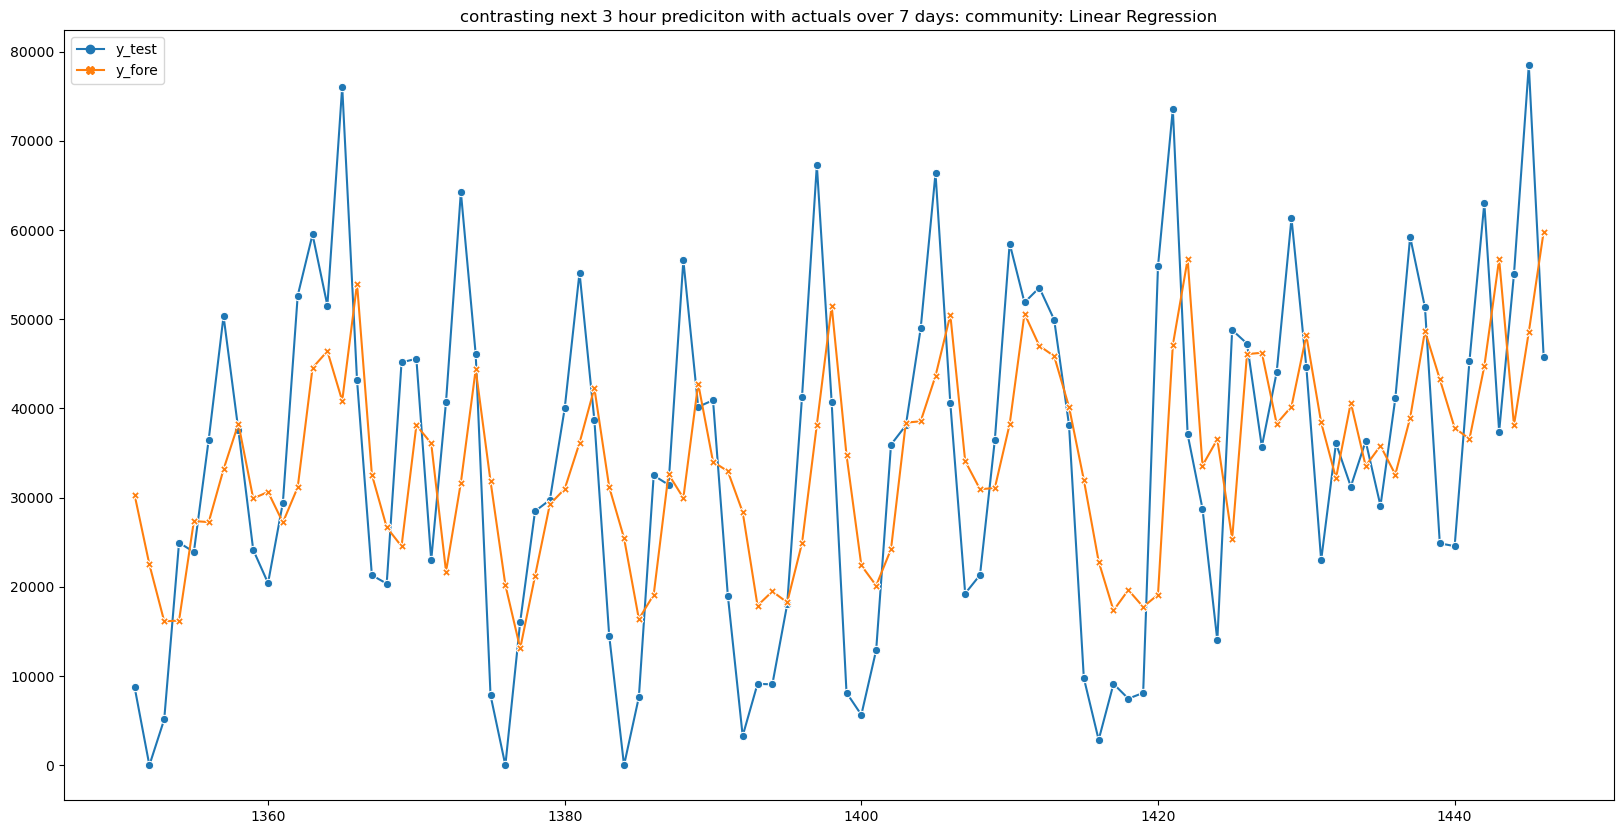

In [132]:
def forecast_3H():
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.linear_model import LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import mean_absolute_error
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_percentage_error
    from sklearn.metrics import r2_score



    df = pd.read_csv('/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data_3H.csv')
    print(len(df))
    df_copy = df.copy(deep=True)
    #lets add my time series info to the dataframe
    desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
       'weather_code (wmo code)', 'wind_speed_10m (km/h)',
       'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
       'electric-combined-yesterday', 'electric-combined-last-week'
       ]
    df_copy.dropna(inplace=True)

    y = df_copy.pop('electric-combined_3H-forecast')


    X = df_copy[desired_features]


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=96, shuffle=False)

    model =LinearRegression()
    model.fit(X_train,y_train)
    #y_pred = pd.Series(model.predict(X_train), index = y_train.index)
    y_fore = pd.Series(model.predict(X_test), index = y_test.index)
    
    plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

    plot_data['y_test'] = y_test
    plot_data['y_fore'] = y_fore

    # org_csv = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data.csv')

    
    # org_csv = org_csv['time']

    # plot_data['time'] = org_csv
    # plot_data.set_index('time', inplace=True)
    
    fig, axs = plt.subplots(figsize=(20,10))
    fig1 = sns.lineplot(data=plot_data, ax=axs, markers=True, dashes=False)
    #plt.xticks(ticks= plot_data.index, rotation=90)
    axs.set_title(f'contrasting next 3 hour prediciton with actuals over 7 days: community: Linear Regression')


    #lets check errors
    print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
    print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
    print(f'R-squared error: {r2_score(y_test, y_fore)}')

    print('______________')

    svrgs_parameters = {
    'kernel': ['rbf'],
    'C':     [150000,200000,250000],
    'gamma': [0.004,0.0045,0.005]
}

    # svr_cv = GridSearchCV(svm.SVR(), svrgs_parameters, cv=8, scoring= 'neg_mean_squared_log_error')
    # svr_cv.fit(X_train, y_train)
    # prediction = svr_cv.predict(X_test)
    # print(f'mean absolute error: {mean_absolute_error(y_test, prediction)}')
    # print(f'R-squared error: {r2_score(y_test, prediction)}')
    
forecast_3H()

mean absolute error: 7430.779614285712
mean absolute percentage error: 0.39165712464621155
R-squared error: 0.6961448903498522
______________


/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


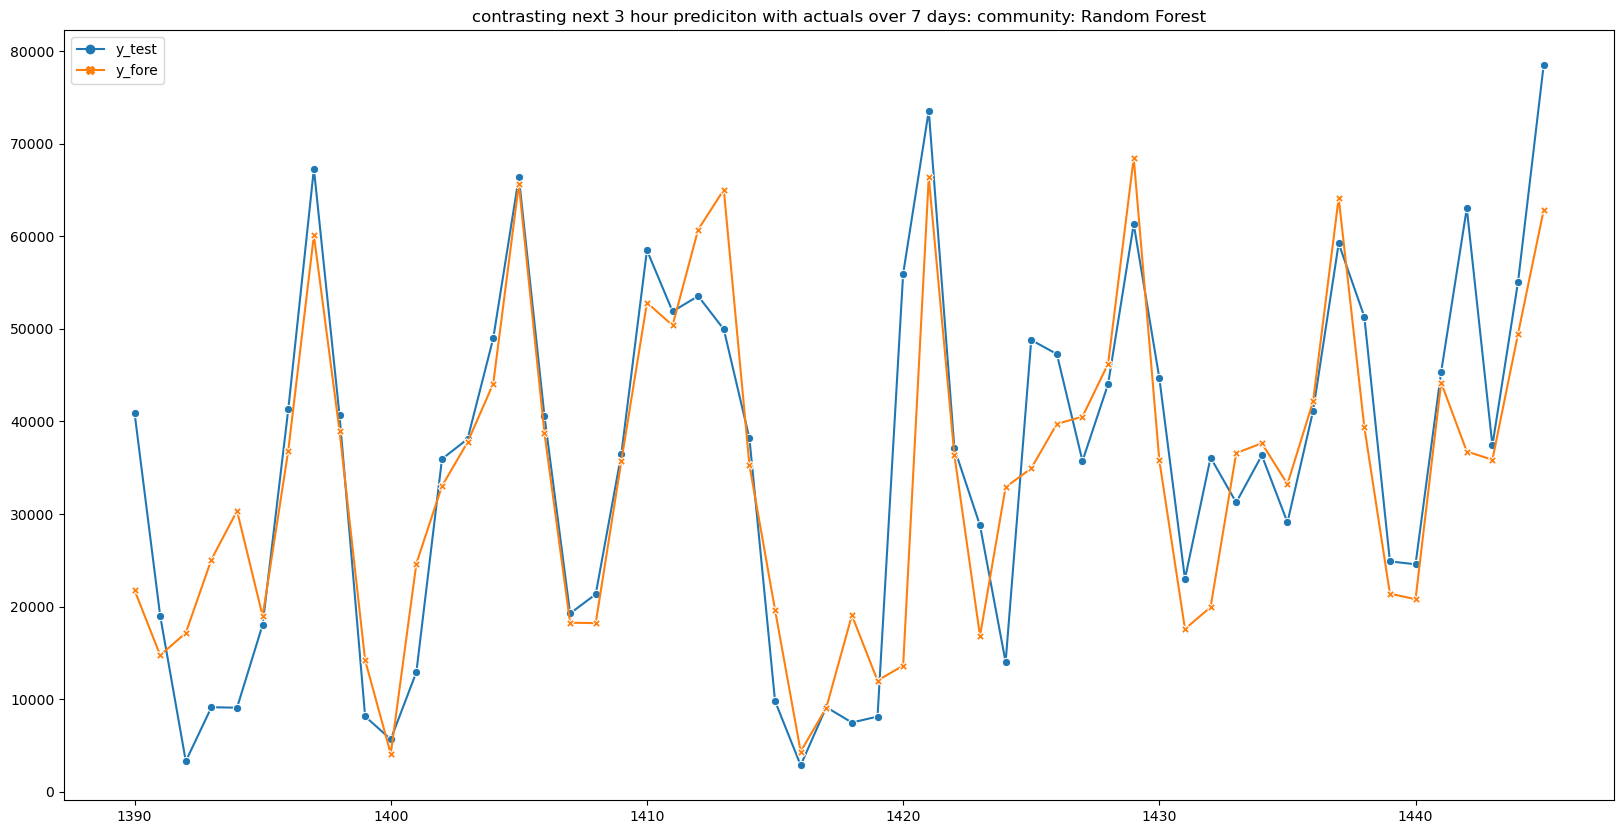

In [134]:
def forecast_all_3H_random_forest_test():
   import pickle
   import pandas as pd
   from sklearn.ensemble import RandomForestRegressor

   import matplotlib.pyplot as plt
   import seaborn as sns
   from sklearn.preprocessing import StandardScaler
   from sklearn.metrics import r2_score
   from statsmodels.stats.outliers_influence import variance_inflation_factor
   import statsmodels.api as sm
   from sklearn.model_selection import train_test_split
   from sklearn.linear_model import LinearRegression
   from sklearn.metrics import mean_absolute_error
   from sklearn.metrics import mean_squared_error
   from sklearn.metrics import mean_absolute_percentage_error

   #lets add my time series info to the dataframe
   desired_features = ['temperature_2m (°C)', 'relative_humidity_2m (%)',
      'weather_code (wmo code)', 'wind_speed_10m (km/h)',
      'wind_direction_10m (°)', 'day', 'hour', 'electric-combined',
      'electric-combined-yesterday', 'electric-combined-last-week']
   df_upload = pd.read_csv(f'/Users/barry/CodeAcademy/Ideal_dataset/combined_houses/6_months_data_3H.csv')
   df = df_upload.copy(deep=True)
   df.dropna(inplace=True)
   df.drop(df.tail(1).index,inplace=True)

   y = df.pop('electric-combined_3H-forecast')


   X = df[desired_features]
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=56, shuffle=False)

   model = RandomForestRegressor()
   model.fit(X_train,y_train)
   y_fore = pd.Series(model.predict(X_test), index = y_test.index)
   plot_data = pd.DataFrame(columns=['y_test', 'y_fore'])

   plot_data['y_test'] = y_test
   plot_data['y_fore'] = y_fore

   fig, axs = plt.subplots(figsize=(20,10))
   fig1 = sns.lineplot(data=plot_data, ax=axs, markers=True, dashes=False)
   #plt.xticks(ticks= plot_data.index, rotation=90)
   axs.set_title(f'contrasting next 3 hour prediciton with actuals over 7 days: community: Random Forest')

   #lets check errors
   print(f'mean absolute error: {mean_absolute_error(y_test, y_fore)}')
   print(f'mean absolute percentage error: {mean_absolute_percentage_error(y_test, y_fore)}')
   print(f'R-squared error: {r2_score(y_test, y_fore)}')

   print('______________')

   svrgs_parameters = {
   'kernel': ['rbf'],
   'C':     [150000,200000,250000],
   'gamma': [0.004,0.0045,0.005]
}

forecast_all_3H_random_forest_test()


 


In [136]:
df.head()

,time,temperature_2m (°C),relative_humidity_2m (%),weather_code (wmo code),wind_speed_10m (km/h),wind_direction_10m (°),day,hour,electric-combined
3036,2017-09-01 00:00:00,10.573529,89.00,0,8.43,256.33,4.0,1.0,279.04
3037,2017-09-01 03:00:00,9.373529,91.33,2,5.60,238.67,4.0,4.0,321.06
3038,2017-09-01 06:00:00,11.177059,87.37,3,3.83,238.00,4.0,7.0,578.11
3039,2017-09-01 09:00:00,13.038235,81.67,3,5.70,157.33,4.0,10.0,329.06
3040,2017-09-01 12:00:00,14.477059,78.00,2,8.07,25.67,4.0,13.0,354.61
